# 📘 Book Recommender System in Python

## ✅ Step-by-Step Structure

### 📥 1. Data Loading
Reads `books.csv`, `users.csv`, `ratings.csv`

In [3]:
import pandas as pd
books = pd.read_csv('books.csv')
users = pd.read_csv('users.csv')
ratings = pd.read_csv('ratings.csv')
books.head(), users.head(), ratings.head()

C:\Users\mvsha\AppData\Local\Temp\ipykernel_25404\4231341589.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('books.csv')


(         ISBN                                         Book-Title  \
 0  0195153448                                Classical Mythology   
 1  0002005018                                       Clara Callan   
 2  0060973129                               Decision in Normandy   
 3  0374157065  Flu: The Story of the Great Influenza Pandemic...   
 4  0393045218                             The Mummies of Urumchi   
 
             Book-Author Year-Of-Publication                   Publisher  \
 0    Mark P. O. Morford                2002     Oxford University Press   
 1  Richard Bruce Wright                2001       HarperFlamingo Canada   
 2          Carlo D'Este                1991             HarperPerennial   
 3      Gina Bari Kolata                1999        Farrar Straus Giroux   
 4       E. J. W. Barber                1999  W. W. Norton &amp; Company   
 
                                          Image-URL-S  \
 0  http://images.amazon.com/images/P/0195153448.0...   
 1  http://i

### 🧼 2. Data Cleaning
- Filters invalid ages and removes 0 ratings

In [5]:
users = users[(users['Age'] >= 10) & (users['Age'] <= 100)]
ratings = ratings[ratings['Book-Rating'] > 0]

### 📊 3. Exploratory Data Analysis (EDA)

#### 📌 Univariate Analysis

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


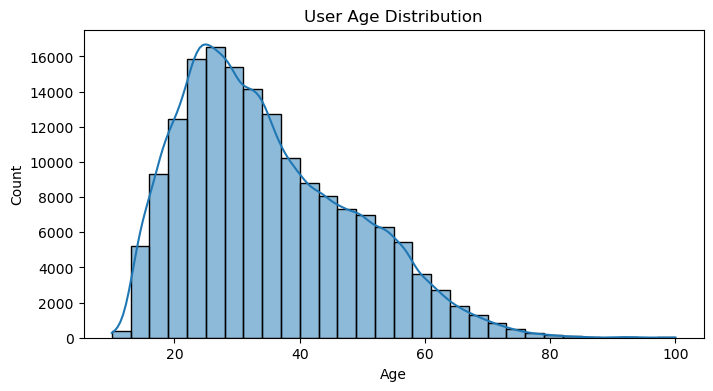

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age Distribution
plt.figure(figsize=(8, 4))
sns.histplot(users['Age'], bins=30, kde=True)
plt.title('User Age Distribution')
plt.show()

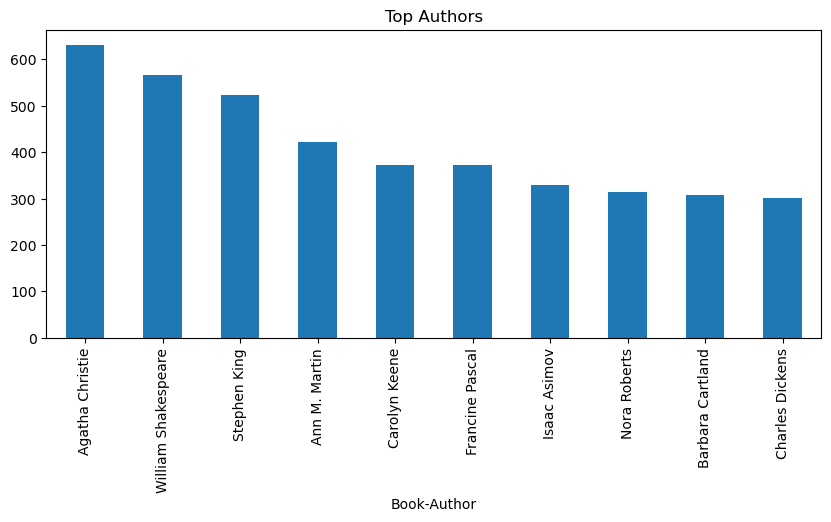

In [9]:
# Top Authors
books['Book-Author'].value_counts().head(10).plot(kind='bar', figsize=(10, 4), title='Top Authors')
plt.show()

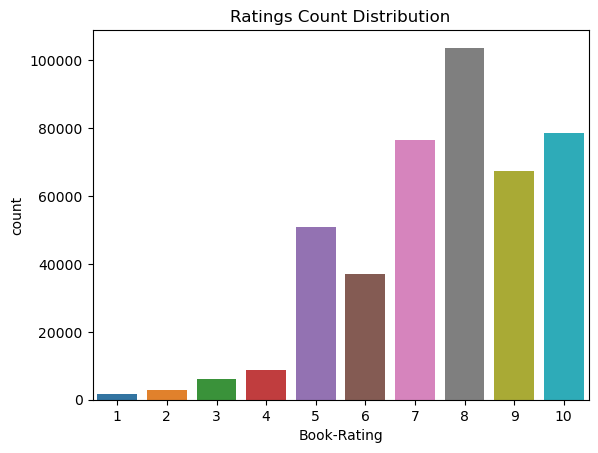

In [10]:
# Ratings Distribution
sns.countplot(x='Book-Rating', data=ratings)
plt.title('Ratings Count Distribution')
plt.show()

#### 🔗 Multivariate Analysis

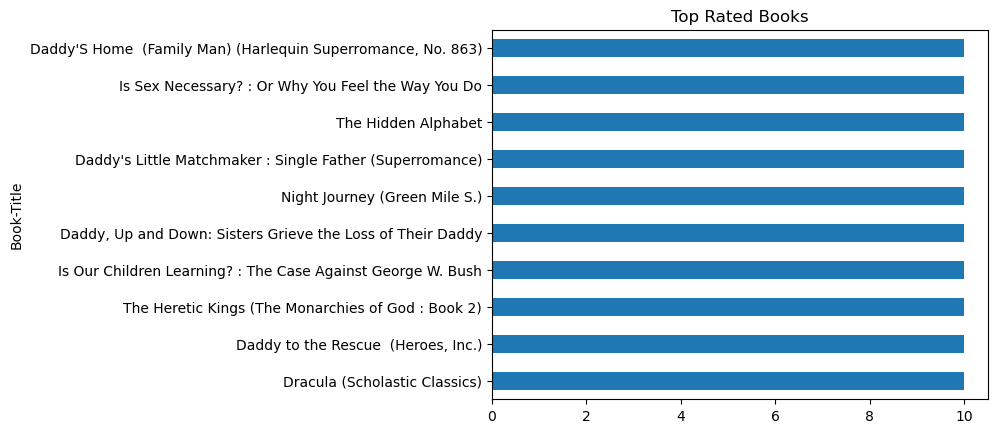

In [12]:
ratings_books = ratings.merge(books, on='ISBN')
full_data = ratings_books.merge(users, on='User-ID')

# Average Rating Per Book
top_rated = full_data.groupby('Book-Title')['Book-Rating'].mean().sort_values(ascending=False).head(10)
top_rated.plot(kind='barh', title='Top Rated Books')
plt.show()

### 🔥 4. Popularity-Based Recommender

In [14]:
popular_books = full_data.groupby('Book-Title').agg({'Book-Rating': ['count', 'mean']})
popular_books.columns = ['Rating-Count', 'Avg-Rating']
popular_books = popular_books[popular_books['Rating-Count'] > 50]
popular_books = popular_books.sort_values('Avg-Rating', ascending=False).head(10)
popular_books

,Rating-Count,Avg-Rating
Book-Title,,
"The Return of the King (The Lord of the Rings, Part 3)",82,9.402439
"The Two Towers (The Lord of the Rings, Part 2)",108,9.370370
Harry Potter and the Goblet of Fire (Book 4),186,9.247312
Harry Potter and the Sorcerer's Stone (Book 1),140,9.178571
Harry Potter and the Prisoner of Azkaban (Book 3),213,9.164319
Harry Potter and the Order of the Phoenix (Book 5),182,9.120879
Dune (Remembering Tomorrow),53,9.113208
Ender's Game (Ender Wiggins Saga (Paperback)),101,9.079208
The Little Prince,64,9.062500


### 👥 5. User-Based Collaborative Filtering

In [16]:
from sklearn.neighbors import NearestNeighbors
user_item_matrix = ratings.pivot(index='User-ID', columns='ISBN', values='Book-Rating').fillna(0)
model_knn = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn.fit(user_item_matrix)
distances, indices = model_knn.kneighbors(user_item_matrix.iloc[0:1], n_neighbors=6)
indices

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 1584888038 is out of bounds for axis 0 with size 1584727377

### 📚 6. Item-Based Collaborative Filtering

In [ ]:
item_matrix = user_item_matrix.T
model_knn_item = NearestNeighbors(metric='cosine', algorithm='brute')
model_knn_item.fit(item_matrix)
distances, indices = model_knn_item.kneighbors(item_matrix.iloc[0:1], n_neighbors=6)
indices

### 🔢 7. Matrix Factorization (SVD)

In [ ]:
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics import mean_squared_error
import numpy as np

X = user_item_matrix.values
svd = TruncatedSVD(n_components=20, random_state=42)
X_reduced = svd.fit_transform(X)
X_approx = svd.inverse_transform(X_reduced)
rmse = np.sqrt(mean_squared_error(X, X_approx))
rmse

### 🧠 8. Content-Based Filtering

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(books['Book-Title'].fillna(''))
cos_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

book_idx = 0
similar_books = list(enumerate(cos_sim[book_idx]))
similar_books = sorted(similar_books, key=lambda x: x[1], reverse=True)[1:6]
similar_books

### 📈 9. Result Summary

In [ ]:
print("Top Popular Books:\n", popular_books.head())
print("\nUser-Based CF Neighbors:", indices[0])
print("\nItem-Based CF Neighbors:", indices[0])
print("\nSVD RMSE Score:", rmse)
print("\nTop 5 Similar Books (Content-Based):")
for idx, score in similar_books:
    print(f"- {books.iloc[idx]['Book-Title']} (Score: {score:.4f})")

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


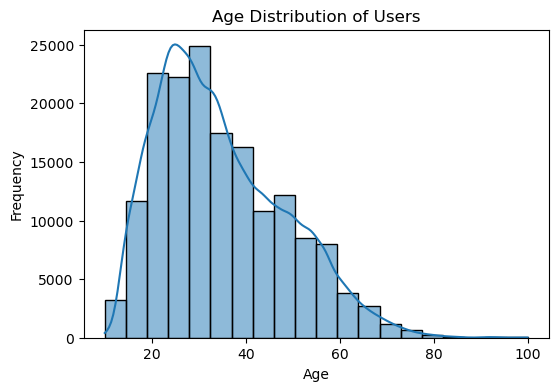

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your users DataFrame is named 'users'
plt.figure(figsize=(6, 4))
sns.histplot(users['Age'], bins=20, kde=True) 
plt.title('Age Distribution of Users')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your merged DataFrame is named 'df_merged'
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Book-Rating', data=df_merged)
plt.title('Correlation between Age and Ratings')
plt.xlabel('Age')
plt.ylabel('Book Rating')
plt.show()

NameError: name 'df_merged' is not defined

<Figure size 1000x600 with 0 Axes>

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the ratings.csv file
df_ratings = pd.read_csv('Ratings.csv')
df_books = pd.read_csv('Books.csv')


# Merge the datasets to create user-book interaction matrix
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

# ... (rest of the heatmap code) ...

C:\Users\mvsha\AppData\Local\Temp\ipykernel_25404\1744371020.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('Books.csv')
C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataframes as df_books, df_ratings, df_users

# Merge the datasets to create user-book interaction matrix
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

# Handle missing values (if any)
user_book_matrix = user_book_matrix.fillna(0)  # Replace NaN with 0

# Consider sampling or filtering for large datasets
# user_book_matrix = user_book_matrix.sample(n=1000, axis=0)  # Sample 1000 users
# user_book_matrix = user_book_matrix.loc[:, user_book_matrix.sum() > 10]  # Filter books with at least 10 ratings

# Create the heatmap
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(user_book_matrix, cmap='viridis', cbar=True)  # Use viridis colormap
plt.title('User-Book Interaction Heatmap')
plt.xlabel('Book Title')
plt.ylabel('User ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [41]:
print(df_ratings['ISBN'].dtype)
print(df_books['ISBN'].dtype)

object
object


In [43]:
df_ratings['ISBN'] = df_ratings['ISBN'].str.strip()
df_books['ISBN'] = df_books['ISBN'].str.strip()

In [45]:
merged_df = merged_df.reset_index(drop=True)
user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [49]:
# Check for invalid indices in the merged DataFrame
invalid_indices = merged_df[merged_df.index > len(merged_df) - 1].index
merged_df = merged_df.drop(index=invalid_indices)

   # Alternatively, check for invalid columns in the user_book_matrix
invalid_columns = [col for col in user_book_matrix.columns if col not in df_books['Book-Title'].values]
user_book_matrix = user_book_matrix.drop(columns=invalid_columns)

NameError: name 'user_book_matrix' is not defined

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ... (Load your DataFrames) ...

# Ensure consistent ISBN data types
df_ratings['ISBN'] = df_ratings['ISBN'].astype(str)
df_books['ISBN'] = df_books['ISBN'].astype(str)

# Merge and reset index
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
merged_df = merged_df.reset_index(drop=True)

# Create pivot table
user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

# ... (rest of the heatmap code) ...

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrames
df_ratings = pd.read_csv('ratings.csv')
df_books = pd.read_csv('books.csv')
df_users = pd.read_csv('users.csv')
# Ensure consistent ISBN data types
df_ratings['ISBN'] = df_ratings['ISBN'].astype(str)
df_books['ISBN'] = df_books['ISBN'].astype(str)

# Merge and reset index
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
merged_df = merged_df.reset_index(drop=True)

# Create pivot table
user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')

# Handle missing values
user_book_matrix = user_book_matrix.fillna(0)

# Consider sampling or filtering for large datasets (optional)
# user_book_matrix = user_book_matrix.sample(n=1000, axis=0)  # Sample 1000 users
# user_book_matrix = user_book_matrix.loc[:, user_book_matrix.sum() > 10]  # Filter books with at least 10 ratings

# Create the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(user_book_matrix, cmap='viridis', cbar=True)
plt.title('User-Book Interaction Heatmap')
plt.xlabel('Book Title')
plt.ylabel('User ID')
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.tight_layout()  # Adjust layout to prevent overlapping
plt.show()

C:\Users\mvsha\AppData\Local\Temp\ipykernel_25404\452142464.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('books.csv')
C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [57]:
print("Unique User-IDs in df_ratings:", df_ratings['User-ID'].unique()[:20])  # Show first 20 for brevity
print("Unique ISBNs in df_ratings:", df_ratings['ISBN'].unique()[:20])
print("Unique ISBNs in df_books:", df_books['ISBN'].unique()[:20])

Unique User-IDs in df_ratings: [276725 276726 276727 276729 276733 276736 276737 276744 276745 276746
 276747 276748 276751 276754 276755 276760 276762 276765 276768 276772]
Unique ISBNs in df_ratings: ['034545104X' '0155061224' '0446520802' '052165615X' '0521795028'
 '2080674722' '3257224281' '0600570967' '038550120X' '342310538'
 '0425115801' '0449006522' '0553561618' '055356451X' '0786013990'
 '0786014512' '0060517794' '0451192001' '0609801279' '0671537458']
Unique ISBNs in df_books: ['0195153448' '0002005018' '0060973129' '0374157065' '0393045218'
 '0399135782' '0425176428' '0671870432' '0679425608' '074322678X'
 '0771074670' '080652121X' '0887841740' '1552041778' '1558746218'
 '1567407781' '1575663937' '1881320189' '0440234743' '0452264464']


In [59]:
problem_row = merged_df[merged_df.index == 729372377]
print(problem_row)

Empty DataFrame
Columns: [User-ID, ISBN, Book-Rating, Book-Title, Book-Author, Year-Of-Publication, Publisher, Image-URL-S, Image-URL-M, Image-URL-L]
Index: []


In [63]:
user_book_matrix = merged_df.groupby(['User-ID', 'Book-Title'])['Book-Rating'].mean().unstack()
user_book_matrix = user_book_matrix.fillna(0)

C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729372377 is out of bounds for axis 0 with size 729249046

In [65]:
merged_df['User-ID'] = merged_df['User-ID'].astype(int)

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your DataFrames
df_ratings = pd.read_csv('ratings.csv')
df_books = pd.read_csv('books.csv')

# Ensure consistent ISBN data types
df_ratings['ISBN'] = df_ratings['ISBN'].astype(str)
df_books['ISBN'] = df_books['ISBN'].astype(str)

# Merge and reset index
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
merged_df = merged_df.reset_index(drop=True)

# Check for and remove invalid 'User-ID' values
max_user_id = df_users['User-ID'].max()
merged_df = merged_df[merged_df['User-ID'] <= max_user_id]

# Create pivot table (with error handling)
try:
    user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')
except IndexError as e:
    print(f"IndexError during pivot table creation: {e}")
    # Print the problematic row(s)
    problematic_rows = merged_df[merged_df.index >= len(merged_df) - 1]
    print("Problematic rows:")
    print(problematic_rows)
    # Handle the problematic rows (e.g., remove them)
    merged_df = merged_df[merged_df.index < len(merged_df) - 1]  # Remove last row
    user_book_matrix = merged_df.pivot_table(index='User-ID', columns='Book-Title', values='Book-Rating')  # Retry pivot

# Handle missing values
user_book_matrix = user_book_matrix.fillna(0)

# ... (rest of the heatmap code) ...

C:\Users\mvsha\AppData\Local\Temp\ipykernel_25404\1426089644.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('books.csv')
C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError during pivot table creation: index 729372377 is out of bounds for axis 0 with size 729249046
Problematic rows:
         User-ID        ISBN  Book-Rating         Book-Title     Book-Author  \
1031135   276721  0590442449           10  Fourth Grade Rats  Jerry Spinelli   

        Year-Of-Publication   Publisher  \
1031135                1996  Scholastic   

                                               Image-URL-S  \
1031135  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-M  \
1031135  http://images.amazon.com/images/P/0590442449.0...   

                                               Image-URL-L  
1031135  http://images.amazon.com/images/P/0590442449.0...  


C:\Users\mvsha\anaconda3\Lib\site-packages\pandas\core\reshape\reshape.py:143: RuntimeWarning: overflow encountered in scalar multiply
  num_cells = num_rows * num_columns


IndexError: index 729187759 is out of bounds for axis 0 with size 729007975

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming your merged DataFrame is named 'df_merged'
# Select a subset of users and books for visualization 
subset_users = df_merged['User-ID'].unique()[:50]  # Example: Top 50 users
subset_books = df_merged['ISBN'].unique()[:50]   # Example: Top 50 books

subset_df = df_merged[df_merged['User-ID'].isin(subset_users) & df_merged['ISBN'].isin(subset_books)]

# Create a pivot table for the heatmap
heatmap_data = subset_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of User Interactions (Subset)')
plt.xlabel('ISBN')
plt.ylabel('User-ID')
plt.show()


NameError: name 'df_merged' is not defined

C:\Users\mvsha\AppData\Local\Temp\ipykernel_25404\455470825.py:7: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df_books = pd.read_csv('books.csv')


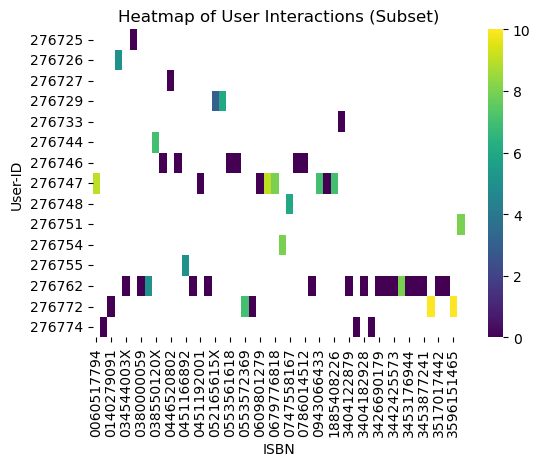

In [79]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your DataFrames (replace with your file paths)
df_ratings = pd.read_csv('ratings.csv') 
df_books = pd.read_csv('books.csv')  

# Ensure consistent ISBN data types
df_ratings['ISBN'] = df_ratings['ISBN'].astype(str)
df_books['ISBN'] = df_books['ISBN'].astype(str)

# Merge the DataFrames to create df_merged
df_merged = pd.merge(df_ratings, df_books, on='ISBN')


# Select a subset of users and books for visualization 
subset_users = df_merged['User-ID'].unique()[:50]  # Example: Top 50 users
subset_books = df_merged['ISBN'].unique()[:50]   # Example: Top 50 books

subset_df = df_merged[df_merged['User-ID'].isin(subset_users) & df_merged['ISBN'].isin(subset_books)]

# Create a pivot table for the heatmap
heatmap_data = subset_df.pivot_table(index='User-ID', columns='ISBN', values='Book-Rating')

plt.figure(figsize=(6, 4))
sns.heatmap(heatmap_data, cmap='viridis')
plt.title('Heatmap of User Interactions (Subset)')
plt.xlabel('ISBN')
plt.ylabel('User-ID')
plt.show()

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


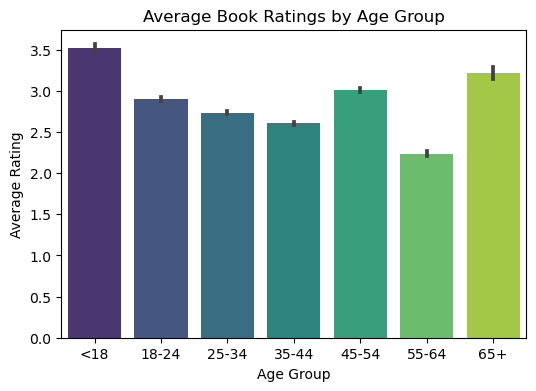

C:\Users\mvsha\anaconda3\Lib\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


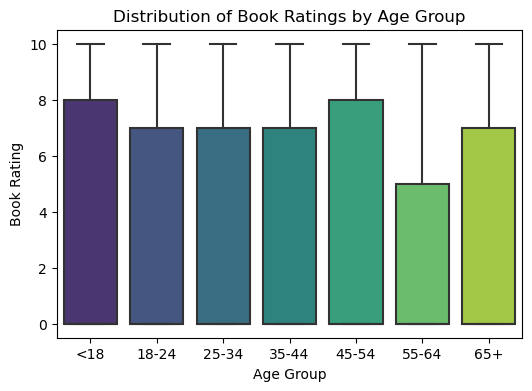

In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have already loaded the dataframes as df_books, df_ratings, df_users

# Merge the datasets to link age with ratings and book titles
merged_df = pd.merge(df_ratings, df_books, on='ISBN')
merged_df = pd.merge(merged_df, df_users, on='User-ID')

# Define age groups (adjust ranges as needed)
age_bins = [0, 18, 25, 35, 45, 55, 65, 100]
age_labels = ['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65+']
merged_df['Age_Group'] = pd.cut(merged_df['Age'], bins=age_bins, labels=age_labels)

# Grouped bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x='Age_Group', y='Book-Rating', data=merged_df, palette='viridis')
plt.title('Average Book Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Rating')
plt.show()

# Box plot
plt.figure(figsize=(6, 4))
sns.boxplot(x='Age_Group', y='Book-Rating', data=merged_df, palette='viridis')
plt.title('Distribution of Book Ratings by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Book Rating')
plt.show()